In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from vizman import viz
import matplotlib.pyplot as plt
import utils as ut
import seaborn as sns
import pandas as pd
import numpy as np

default_things: str = "../Pyvizman/vizman/"
default_colors: dict = viz.load_data_from_json(default_things + "colors.json")

viz.set_visual_style(
    json_color_path=default_things + "colors.json", change_colors=False
)


In [14]:
network_type:str = "binary" # binary or weighted

In [15]:
spectral_dataset_path: str = f"datasets/{network_type}/spectral/"
spectral_dataset:np.ndarray = np.load(spectral_dataset_path + "eigenvalues_synthetic.npy").mean(axis=1)


In [16]:
spectral_dataset.shape

(3, 11, 256)

In [17]:
conditions:list = ['random', 'small_world', 'modular']
reciprocities:list = [str(i/10) for i in range(11)]
condition_list:list = np.repeat(conditions,11*256)
reciprocity_list:list = np.tile(np.repeat(reciprocities, 256), 3)
eigenvalues_flat:np.ndarray = spectral_dataset.reshape(-1)

In [18]:
spectral_dataset_df:pd.DataFrame = pd.DataFrame({
    'condition': condition_list,
    'reciprocity': reciprocity_list,
    'real': eigenvalues_flat.real,
    'imaginary': eigenvalues_flat.imag
})

random_df:pd.DataFrame = spectral_dataset_df[spectral_dataset_df['condition'] == 'random']
small_world_df:pd.DataFrame = spectral_dataset_df[spectral_dataset_df['condition'] == 'small_world']
modular_df:pd.DataFrame = spectral_dataset_df[spectral_dataset_df['condition'] == 'modular']

In [19]:
spectral_dataset_df

,condition,reciprocity,real,imaginary
0,random,0.0,12.68830,0.00000
1,random,0.0,-0.15530,2.25750
2,random,0.0,0.08512,-1.62016
3,random,0.0,-0.37580,1.37842
4,random,0.0,0.08240,-1.11914
...,...,...,...,...
8443,modular,1.0,-0.47296,0.00000
8444,modular,1.0,-0.38142,0.00000
8445,modular,1.0,-0.39896,0.00000
8446,modular,1.0,-0.32528,0.00000


In [20]:
reciprocity_colors = sns.blend_palette(
    [default_colors["purples"]["REDISH_PURPLE"],
     default_colors["warms"]["YELLOW"]],n_colors=11
)
reciprocity_colors

[(np.float64(0.6549019607843137),
  np.float64(0.00392156862745098),
  np.float64(0.396078431372549)),
 (np.float64(0.679123414071511),
  np.float64(0.07197231833910034),
  np.float64(0.3645520953479431)),
 (np.float64(0.7043137254901961),
  np.float64(0.1427450980392157),
  np.float64(0.3317647058823529)),
 (np.float64(0.7285351787773933),
  np.float64(0.21079584775086502),
  np.float64(0.300238369857747)),
 (np.float64(0.7537254901960785),
  np.float64(0.2815686274509804),
  np.float64(0.26745098039215687)),
 (np.float64(0.7789158016147636),
  np.float64(0.3523414071510957),
  np.float64(0.23466359092656672)),
 (np.float64(0.8031372549019608),
  np.float64(0.42039215686274506),
  np.float64(0.2031372549019608)),
 (np.float64(0.828327566320646),
  np.float64(0.49116493656286037),
  np.float64(0.17034986543637065)),
 (np.float64(0.8525490196078431),
  np.float64(0.5592156862745098),
  np.float64(0.13882352941176468)),
 (np.float64(0.8777393310265282),
  np.float64(0.6299884659746251),
  np.float64(0.10603613994617456)),
 (np.float64(0.9019607843137255),
  np.float64(0.6980392156862745),
  np.float64(0.07450980392156863))]

/Users/ICNS/Library/Mobile Documents/com~apple~CloudDocs/Work/Reciprocity/utils.py:157: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data,y=y,ax=axes[2],**kde_kwargs)
/Users/ICNS/Library/Mobile Documents/com~apple~CloudDocs/Work/Reciprocity/utils.py:157: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data,y=y,ax=axes[2],**kde_kwargs)
/Users/ICNS/Library/Mobile Documents/com~apple~CloudDocs/Work/Reciprocity/utils.py:157: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data,y=y,ax=axes[2],**kde_kwargs)


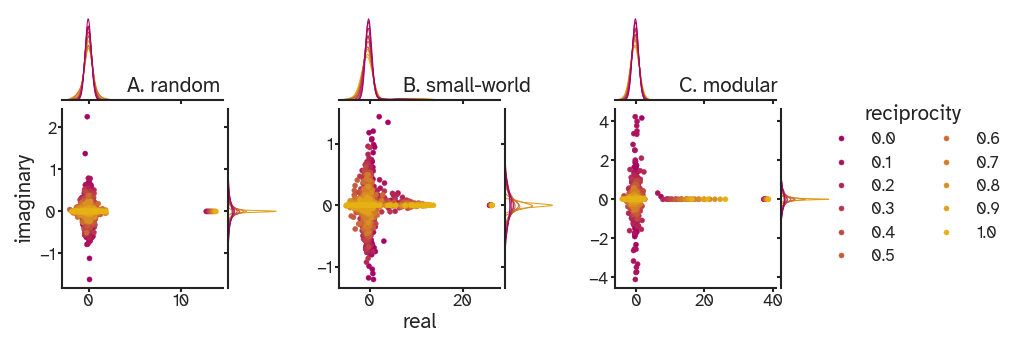

In [21]:
plot_kwargs:dict = {
    'edgecolors':None,
    's':6,
    'hue':'reciprocity',
    'palette':reciprocity_colors,
    'legend':False, 'rasterized':True}

kde_kwargs:dict = {
    'bw_adjust':1,
    'lw':0.5,
    'hue':'reciprocity',
    'palette':reciprocity_colors,
    'legend':False,}

fig, axes = plt.subplot_mosaic("""
                               AAA..DDD..GGG..
                               BBBC.EEEF.HHHI.
                               BBBC.EEEF.HHHI.
                               """,

                               figsize=viz.cm_to_inch([18,6]),
                               dpi=150)
ut.plot_scatter_and_kde(random_df,'real','imaginary',[axes['A'],axes['B'],axes['C']],scatter_kwargs=plot_kwargs,kde_kwargs=kde_kwargs)
ut.plot_scatter_and_kde(small_world_df,'real','imaginary',[axes['D'],axes['E'],axes['F']],scatter_kwargs=plot_kwargs,kde_kwargs=kde_kwargs)
plot_kwargs['legend'] = True
ut.plot_scatter_and_kde(modular_df,'real','imaginary',[axes['G'],axes['H'],axes['I']],scatter_kwargs=plot_kwargs,kde_kwargs=kde_kwargs)

axes['B'].set_ylabel('imaginary')
axes['E'].set_xlabel('real')
axes['A'].annotate('A. random', xy=(0.4, 0.1), xycoords="axes fraction")
axes['D'].annotate('B. small-world', xy=(0.4, 0.1), xycoords="axes fraction")
axes['G'].annotate('C. modular', xy=(0.4, 0.1), xycoords="axes fraction")

fig.subplots_adjust(hspace=0.1)
fig.subplots_adjust(wspace=0.1)
sns.move_legend(axes['H'],loc="upper left",bbox_to_anchor=(1.21, 1.11),frameon=False,ncols=2)

plt.savefig(f"figures/{network_type}/spectral.pdf",bbox_inches='tight',transparent=True, dpi=600)

/Users/ICNS/Library/Mobile Documents/com~apple~CloudDocs/Work/Reciprocity/utils.py:157: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data,y=y,ax=axes[2],**kde_kwargs)
/Users/ICNS/Library/Mobile Documents/com~apple~CloudDocs/Work/Reciprocity/utils.py:157: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data,y=y,ax=axes[2],**kde_kwargs)
/Users/ICNS/Library/Mobile Documents/com~apple~CloudDocs/Work/Reciprocity/utils.py:157: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data,y=y,ax=axes[2],**kde_kwargs)


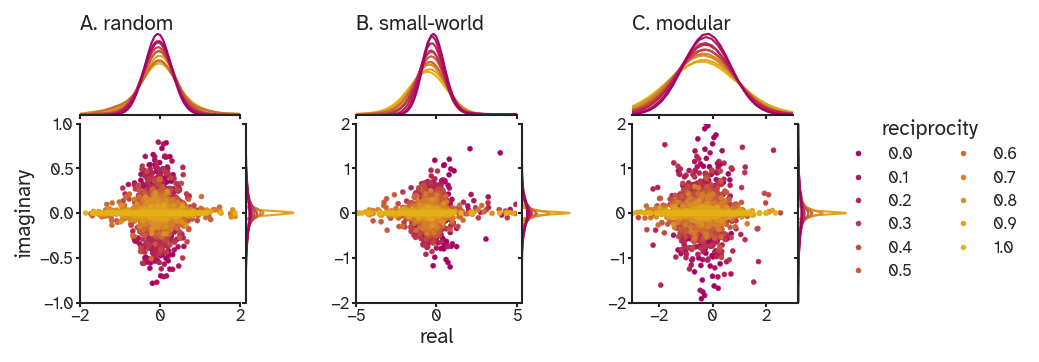

In [22]:
fig, axes = plt.subplot_mosaic("""
                               AAA..DDD..GGG..
                               BBBC.EEEF.HHHI.
                               BBBC.EEEF.HHHI.
                               """,
                               figsize=viz.cm_to_inch([18,6]),
                               dpi=150)
plot_kwargs['legend'] = False

kde_kwargs:dict = {
    'bw_adjust':1,
    'lw':1,
    'hue':'reciprocity',
    'palette':reciprocity_colors,
    'legend':False,}

ut.plot_scatter_and_kde(random_df,'real','imaginary',[axes['A'],axes['B'],axes['C']],scatter_kwargs=plot_kwargs,kde_kwargs=kde_kwargs)
ut.plot_scatter_and_kde(small_world_df,'real','imaginary',[axes['D'],axes['E'],axes['F']],scatter_kwargs=plot_kwargs,kde_kwargs=kde_kwargs)
plot_kwargs['legend'] = True
ut.plot_scatter_and_kde(modular_df,'real','imaginary',[axes['G'],axes['H'],axes['I']],scatter_kwargs=plot_kwargs,kde_kwargs=kde_kwargs)

axes['B'].set_ylabel('imaginary')
axes['E'].set_xlabel('real')

axes['A'].annotate('A. random', xy=(0, 1), xycoords="axes fraction")
axes['D'].annotate('B. small-world', xy=(0, 1), xycoords="axes fraction")
axes['G'].annotate('C. modular', xy=(0, 1), xycoords="axes fraction")

axes['B'].set_xlim(-2,2)
axes['B'].set_ylim(-1,1)

axes['E'].set_xlim(-5,5)
axes['E'].set_ylim(-2,2)

axes['H'].set_xlim(-3,3)
axes['H'].set_ylim(-2,2)

fig.subplots_adjust(hspace=0.1)
fig.subplots_adjust(wspace=0.1)
sns.move_legend(axes['H'],loc="upper left",bbox_to_anchor=(1.21, 1.11),frameon=False,ncols=2)

plt.savefig(f"figures/{network_type}/spectral_zoomed_in.pdf",bbox_inches='tight',transparent=True, dpi=600)